In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline


# Markdownの例

[参考1](http://qiita.com/Thermidor/items/b684cfabe0f2fde0c67b)<br>
[参考2](http://qiita.com/tbpgr/items/989c6badefff69377da7)

---

# hedding
## hedding
### hedding
abcd
----
### abcd ###
abcd

abcd **bold** hijk *italic* opqr

* hoge
  * hoge
    * hogege

> inyo
> inyo
> inyo

inline program ` printf("hello-world")` hoge hoge

| Left | Center | Right | 
|:---|:---:|---:|
| 111 | 222 | 333 |
| e | f | g |

```python
def f(x):
    """a docstring"""
    return x**2
```

abcd

---
    
$$
\begin{align}
\sum_{k=1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6}
\end{align}
$$


# 関数の引数は値渡し？参照渡し？

[参考](http://rcmdnk.github.io/blog/2015/07/08/computer-python/)<br>
[参考２](http://qiita.com/urakarin/items/1d6e0e76bffb9297606e)

Pythonでは関数に値を渡す時にその**参照**が渡されます。

ですが、渡された関数内で変更されるとき、 渡した値自体が変更されるかどうかは 渡されたオブジェクトのタイプによります。

オブジェクトのタイプは**Immutable**(変更不可)と**Mutable**(変更可能)に分けられます。

Immutable: int, float, str, tuple 等
Mutable: list, set, dict 等
このうち、Mutableな値が関数に渡された場合、 中で変更すると値の変更が外にも反映されますが、 Immutableなものに関しては変更されません。

ただ、これもちょっと注意する必要があって、 listでもlist内の項目を変更したり値を追加したりするのではなく、 新たなlist自体を与える様な事をする場合は外では書き換えられません。

In [7]:
def fn(x=[1,2,3]):
    print 'fn: ', x, id(x)
    return x

x = fn()
print 'Default value', x, id(x)

x[0] = 4

y = fn()
print 'Not Default value', y, id(y)


fn:  [1, 2, 3] 120019784
Default value [1, 2, 3] 120019784
fn:  [4, 2, 3] 120019784
Not Default value [4, 2, 3] 120019784


# アンパック

# プロットのサンプル
参考ページ<br>
http://seesaawiki.jp/met-python/d/matplotlib

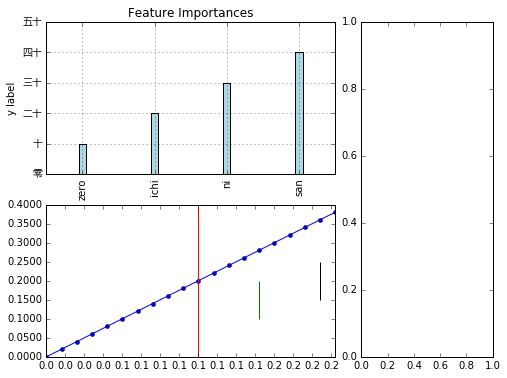

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
import matplotlib.font_manager # 日本語
%matplotlib inline

prop = matplotlib.font_manager.FontProperties(fname="C:/WIndows/Fonts/meiryo.ttc")
fig = plt.figure(figsize=[8,6])
G = gridspec.GridSpec(2,3)

### Figure 1
width=0.1
ax = plt.subplot(G[0,:2])
plt.grid(True)
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Feature Importances')
plt.bar([0,1,2,3], [10,20,30,40], width=width, color='lightblue', align='center')
plt.xticks([0,1,2,3], ['zero','ichi','ni','san'], rotation=90)
ax.set_yticks( range(0,51,10) )
ax.set_yticklabels( [ u'零', u'十', u'二十',  u'三十',  u'四十', u'五十' ] ,fontproperties=prop)
#plt.xlim([-1, 4])
#plt.tight_layout()

### Figure 2
plt.subplot(G[1,:2])
plt.plot( np.arange(0, 0.2, 0.01), np.arange( 0, 0.4, 0.02), 'bo-', markersize=4  )
plt.xticks( np.arange(0, 0.2, 0.0125))
# tick step
plt.xticks( np.arange(0, 0.2, 0.0125))
# virtical lines
plt.axvline( 0.1, color='r')
plt.vlines( [0.14,0.18], [0.1,0.15], [0.2, 0.25], colors=['g','k']) # ( x, ymin, ymax, ... )
ax = plt.gca()
# precision
ax.xaxis.set_major_formatter( FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter( FormatStrFormatter('%0.4f'))

### Figure 3
plt.subplot(G[:,2])

### After the plot
plt.savefig('plot_sample.png', dpi=300)
plt.show()

# Pandasのサンプル
参考<br>
http://sinhrks.hatenablog.com/entry/2014/11/12/233216

In [10]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'C1': [11, 21, 31],
                   'C2': [12, 22, 32],
                   'C3': [13, 23, 33]})
print df
print df [[True, False, True]]
ary = df.values.astype(np.int32)
idx = df.index.values.astype(np.int32)
print ary.dtype
print idx.dtype
print df.ix[:1,:1]  # including index=1 (loc behavior), NOT including column=1(iloc behavior)
print df.iloc[:1,:1] # use iloc for location index

   C1  C2  C3
0  11  12  13
1  21  22  23
2  31  32  33
   C1  C2  C3
0  11  12  13
2  31  32  33
int32
int32
   C1
0  11
1  21
   C1
0  11


## ボタン等のつけ方
[参考](http://myenigma.hatenablog.com/entry/2015/08/30/223559)

# Waveファイルの扱い
[参考1](http://yukara-13.hatenablog.com/entry/2013/11/09/103848)<br>
[参考2](http://qiita.com/yu_tailsfox/items/86380a0d4d016e1634f1)<br>
[参考3](https://docs.scipy.org/doc/scipy-0.18.1/reference/io.html)

In [11]:
# -*- coding: utf-8 -*-
#from scipy.io.wavfile import read as siw
import scipy.io.wavfile as siw

#wavfile = "./test.wav"
wavfile = "../pydub/test/data/test1.wav"

fs, data = siw.read(wavfile)

print "Sampling rate :", fs

if (data.shape[1] == 2):
    left = data[:, 0]
    right = data[:, 1]

siw.write( "test_out.wav",  fs, data )

Sampling rate : 32000


# 連立方程式を解く
[参考１](http://myenigma.hatenablog.com/entry/2015/11/21/222755#連立方程式を解く)

# 改行なしで文字列を出力したい
[参考](http://www.lifewithpython.com/2013/12/python-print-without-.html)<br>
ひとつめは print string, を使う方法です。


In [12]:
print "hello",
print "hello",
print "hello"

hello hello hello


もうひとつは sys.stdout.write() を使う方法です。

In [13]:
import sys
sys.stdout.write("hello")
sys.stdout.write("hello")
sys.stdout.write("hello")

hellohellohello

Python3で改行を入れてほしくない場合は次のようにするとよいようです。

In [16]:
# case in Python 3
print("hello", end="")
print("hello", end="")

hellohello

ちなみに、Python2.6以降であれば、次の一文を宣言すると、 print 文を上書きする形でPython3の print 関数を使うことができるようになります。

In [15]:
## case in Python 2.6~
# from __future__ import print_function
# print("hello", end="")
# print("hello", end="")

hellohello

# global変数
関数の中でグローバル変数は参照できるが、そのままでは変更できない。
global 変数名 でグローバル宣言すると変更できる。
宣言せずに代入すると別インスタンスが生成される模様。


# Numpy関係

## 配列の基本

In [1]:
aa = [[1,2],[3,4]]
aanp = np.array(aa)
print aa[1], aanp[1] 
print aa[1][1], aanp[1][1]
print type(aa[1][1]), type(aanp[1][1])


[3, 4] [3 4]
4 4
<type 'int'> <type 'numpy.int32'>


In [2]:
print aa[[0]]

TypeError: list indices must be integers, not list

In [7]:
print aanp[[0]]
print aanp[[0,1]]
print aanp[[0,1,1,0]][2]

[[1 2]]
[[1 2]
 [3 4]]
[3 4]


In [4]:
print aanp[[True,True]]

[[3 4]
 [3 4]]


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


In [5]:
print aanp[np.array([True,True])]

[[1 2]
 [3 4]]


In [6]:
print aanp[np.array([True,True])][0]

[1 2]


In [7]:
print aanp == 1

[[ True False]
 [False False]]


In [8]:
print aanp[aanp == 1]
print aanp[0,0]
print aanp[0][0]
print type(aanp[aanp==1])

[1]
1
1
<type 'numpy.ndarray'>


In [9]:
print (aanp[aanp==1]).shape
print aanp[0][0].shape
print aa[0][0].shape

(1,)
()


AttributeError: 'int' object has no attribute 'shape'

## テーブルルックアップ

In [17]:
table = np.array([5,4,3,2,1,0])
indata = np.array([[0,1,2],[3,4,5]])
table[indata]


array([[5, 4, 3],
       [2, 1, 0]])

## ravelと flattenの違い
ravel は可能な限りコピーを作らず見た目だけを変えるのに対し、flattenはコピーを返す

In [10]:
aa = np.array( [[1,2],[3,4]])
print aa.ravel(), aa.ravel('C'), aa.ravel('F')

[1 2 3 4] [1 2 3 4] [1 3 2 4]


## numpy.bincount()
配列に含まれている０と１の数を数えるのに便利

In [11]:
a = [0, 1, 0, 1, 1, 0, 0]
np.bincount(a)

array([4, 3])

# Numpy配列のbroadcasting(次元の拡張)
Numpy が配列全てを変換して同じサイズを持つようにできる場合に行われる変換を broadcasting と呼びます。

In [12]:
x = np.arange(5)
y = np.arange(5)[:,np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [ 1.        ,  1.41421356,  2.23606798,  3.16227766,  4.12310563],
       [ 2.        ,  2.23606798,  2.82842712,  3.60555128,  4.47213595],
       [ 3.        ,  3.16227766,  3.60555128,  4.24264069,  5.        ],
       [ 4.        ,  4.12310563,  4.47213595,  5.        ,  5.65685425]])

# reshape の -1

配列の総要素数が不明の場合は，大きさが不明な次元で -1 を指定すると適切な値が自動的に設定されます．

In [13]:
np.arange(6).reshape((2, -1))

array([[0, 1, 2],
       [3, 4, 5]])

In [14]:
np.arange(5).reshape((-1,1))

array([[0],
       [1],
       [2],
       [3],
       [4]])

# バイナリファイルを一次元配列として全部読み込む

In [15]:
with open( 'foo.csv', 'rb') as fp:
    data = np.fromfile( fp, dtype=np.int32 )
data

array([221391921, 875311882])

## csv ファイルの読み書き

In [16]:
data = np.genfromtxt( "foo.csv", dtype=int, delimiter="," ) # loadtxtも可だが、欠落データをnanで埋めてくれる機能はない
print data.dtype
np.savetxt("bar.csv", data, delimiter=",", fmt="%d")

int32


## Numba でお気楽高速化

In [18]:
from numba import jit

def hoge(xx):
    wa = 0
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            wa = wa + xx[i,j]
    return wa

@jit
def hoge2(xx):
    wa = 0
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            wa = wa + xx[i,j]
    return wa

xx = np.random.rand(100,100)
%timeit hoge(xx)
xx = np.random.rand(100,100)
%timeit hoge2(xx)

xx = np.random.rand(100,100)
%timeit hoge(xx)
xx = np.random.rand(100,100)
%timeit hoge2(xx)

100 loops, best of 3: 5.12 ms per loop
The slowest run took 6625.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.6 µs per loop
100 loops, best of 3: 5.04 ms per loop
100000 loops, best of 3: 12.6 µs per loop


In [19]:
%timeit np.sum(xx)

The slowest run took 4.68 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 16.4 µs per loop


## 行列のスプリット
array_split は割り切れない場合は適当に配分してくれるが、split はエラーになる

In [18]:
a = np.array(range(10))
# splits tekito-ni
aa = np.array_split( a, 3 )
print type(aa)
print type(aa[0])
print aa
# causes error
np.split(a,3)

<type 'list'>
<type 'numpy.ndarray'>
[array([0, 1, 2, 3]), array([4, 5, 6]), array([7, 8, 9])]


ValueError: array split does not result in an equal division

## 次元の追加、削減

In [54]:
>>> x = np.array([[[0], [1], [2]]])
>>> x.shape
(1, 3, 1)
>>> xsqz = np.squeeze(x)
xsqz.shape
(3,)
>>> np.squeeze(x, axis=(2,)).shape
(1, 3)

(1, 3)

In [53]:
xsqz_ax1 = xsqz.reshape( [-1,xsqz.size,1] )
print xsqz_ax1.shape
xsqz_ax2 = xsqz_ax1[:,:,:,np.newaxis]
print xsqz_ax2.shape

(1, 3, 1)
(1, 3, 1, 1)
